### Download and Import the CSV Data as Pandas DataFrame

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
import os
filename = 'D:\CarDekho\Dataset\All_Cities.csv'
print('-'*100)
print('D:\CarDekho\Dataset\All_Cities.csv')
print('-'*100)

df = pd.read_csv('D:\CarDekho\Dataset\All_Cities.csv', index_col=False)


----------------------------------------------------------------------------------------------------
D:\CarDekho\Dataset\All_Cities.csv
----------------------------------------------------------------------------------------------------


In [5]:
print('The size of Dataframe is: ', df.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
df.info()
print('-'*100)

The size of Dataframe is:  (2652, 16)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuel_type           2652 non-null   object 
 1   body_type           2652 non-null   object 
 2   km_driven           2652 non-null   int64  
 3   owner               2652 non-null   object 
 4   price               2652 non-null   int64  
 5   manufacturing_year  2652 non-null   int64  
 6   link                2652 non-null   object 
 7   features            2618 non-null   object 
 8   oem                 2652 non-null   object 
 9   model               2652 non-null   object 
 10  registration_year   2652 non-null   float64
 11  Mileage             2652 non-null   float64
 12  S

## Numerical & categorical columns

In [6]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['km_driven', 'price', 'manufacturing_year', 'registration_year', 'Mileage', 'Seats']

We have 10 categorical features : ['fuel_type', 'body_type', 'owner', 'link', 'features', 'oem', 'model', 'transmission', 'variantName', 'City']


## Checking missing values

In [7]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
features,34,1.282051
Seats,1,0.037707
fuel_type,0,0.000000
body_type,0,0.000000
km_driven,0,0.000000
owner,0,0.000000
price,0,0.000000
manufacturing_year,0,0.000000
link,0,0.000000
oem,0,0.000000


## Fill and save missing values

In [8]:
# Load your dataset
df = pd.read_csv('D:\CarDekho\Dataset\All_Cities.csv')

# Fill missing values in the categorical columns with 'Unknown'
df['features'].fillna('Unknown', inplace=True)
df['Seats'].fillna(0, inplace=True)  # Replace with 0 for numerical data if needed

# Save the filled DataFrame to a new CSV file
df.to_csv('All_Cities.csv', index=False)

# Display the cleaned DataFrame
print(df.head())


  fuel_type  body_type  km_driven        owner    price  manufacturing_year   
0    Petrol  Hatchback     120000  Third Owner   400000                2015  \
1    Diesel        SUV      60000  First Owner   790000                2015   
2    Diesel        SUV      20000  First Owner  1900000                2020   
3    Petrol        SUV      30000  First Owner  1200000                2021   
4    Petrol  Hatchback      50000  First Owner   690000                2018   

                                                link   
0  https://www.cardekho.com/used-car-details/used...  \
1  https://www.cardekho.com/used-car-details/used...   
2  https://www.cardekho.com/used-car-details/used...   
3  https://www.cardekho.com/used-car-details/used...   
4  https://www.cardekho.com/used-car-details/used...   

                                            features      oem   
0  Power Steering, Power Windows Front, Air Condi...   Maruti  \
1  Power Steering, Power Windows Front, Air Condi...   Mar

## Checking filled data

In [9]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
fuel_type,0,0.0
body_type,0,0.0
km_driven,0,0.0
owner,0,0.0
price,0,0.0
manufacturing_year,0,0.0
link,0,0.0
features,0,0.0
oem,0,0.0
model,0,0.0


#### After inpecting there are no missing values

In [10]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,km_driven,price,manufacturing_year,registration_year,Mileage,Seats
count,2652.000000,2.652000e+03,2652.000000,2652.000000,2652.000000,2652.000000
mean,65768.590121,7.352894e+05,2015.370287,2015.487698,18.986525,5.255656
std,38024.856866,7.602077e+05,4.889977,4.590445,4.682569,0.766289
min,150.000000,1.000000e+00,1985.000000,2002.000000,7.810000,0.000000
25%,30000.000000,2.800000e+05,2012.000000,2012.000000,16.800000,5.000000
50%,60000.000000,5.200000e+05,2016.000000,2016.000000,18.840127,5.000000
75%,90000.000000,9.000000e+05,2019.000000,2019.000000,21.100000,5.000000
max,171000.000000,9.600000e+06,2023.000000,2023.000000,140.000000,10.000000


In [11]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
df.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,fuel_type,body_type,owner,link,features,oem,model,transmission,variantName,City
count,2652,2652,2652,2652,2652,2652,2652,2652,2652,2652
unique,5,7,6,2652,225,32,255,2,1204,6
top,Petrol,Hatchback,First Owner,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Maruti,Honda City,Manual,LXI,Jaipur
freq,1577,1015,1507,1,469,669,102,2104,51,587


## Checking Records

In [12]:
print('-'*125)
print('Checking records for mis-spell, typo-error etc.')
print('-'*125)

print("'car_name' variable have {} unique category : \n{}\n".format(df['model'].nunique(), df['model'].unique()))
print('-'*125)

print("'brand' variable have {} unique category : \n{}\n".format(df['oem'].nunique(), df['oem'].unique()))
print('-'*125)

print("'Variant' variable have {} unique category : \n{}\n".format(df['variantName'].nunique(), df['variantName'].unique()))
print('-'*125)

print("'seller_type' variable have {} unique category : \n{}\n".format(df['owner'].nunique(), df['owner'].unique()))
print('-'*125)

print("'fuel_type' variable have {} unique category : \n{}\n".format(df['fuel_type'].nunique(), df['fuel_type'].unique()))
print('-'*125)

print("'transmission_type' variable have {} unique category : \n{}\n".format(df['transmission'].nunique(), df['transmission'].unique()))
print('-'*125)

print("'body_type' variable have {} unique category : \n{}\n".format(df['body_type'].nunique(), df['body_type'].unique()))
print('-'*125)


-----------------------------------------------------------------------------------------------------------------------------
Checking records for mis-spell, typo-error etc.
-----------------------------------------------------------------------------------------------------------------------------
'car_name' variable have 255 unique category : 
['Maruti Celerio' 'Maruti SX4 S Cross' 'Jeep Compass' 'Hyundai Venue'
 'Maruti Baleno' 'Tata Nexon' 'BMW 5 Series' 'Renault Duster'
 'Mercedes-Benz S-Class' 'Honda City' 'Hyundai Santro Xing' 'Audi A4'
 'Hyundai Xcent' 'Maruti Ertiga' 'Toyota Fortuner' 'Hyundai i20'
 'Hyundai Elantra' 'Mahindra Scorpio' 'Maruti Alto'
 'Mercedes-Benz GL-Class' 'Renault KWID' 'Hyundai Getz' 'Skoda Rapid'
 'Maruti Swift' 'Maruti Ciaz' 'Renault Lodgy' 'Maruti Ritz'
 'Volkswagen Polo' 'Hyundai Grand i10' 'Mahindra XUV300' 'Maruti Alto K10'
 'Renault Kiger' 'Volkswagen Vento' 'Toyota Yaris' 'MG Hector'
 'Hyundai Creta' 'BMW 3 Series' 'Kia Seltos' 'Hyundai i10' 'Audi 

In [13]:
print('-'*100)
print('The percentage of each category in categorical column are as follow : ')
print('-'*100 +'\n')
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-'*100)

----------------------------------------------------------------------------------------------------
The percentage of each category in categorical column are as follow : 
----------------------------------------------------------------------------------------------------

fuel_type
Petrol      59.464555
Diesel      38.046757
Cng          1.470588
Lpg          0.527903
Electric     0.490196
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
body_type
Hatchback        38.273002
Sedan            28.318250
SUV              27.073906
MUV               5.392157
Minivans          0.603318
Pickup Trucks     0.188537
Coupe             0.150830
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
owner
First Owner     56.825038
Second Owner    29.864253
Third Owner      8.936652
Fourth Owner     2.488688
0th Owner        1.206637
Fif

## Exploratory Data Analysis (EDA)

### Univariate Analysis of Numerical Features

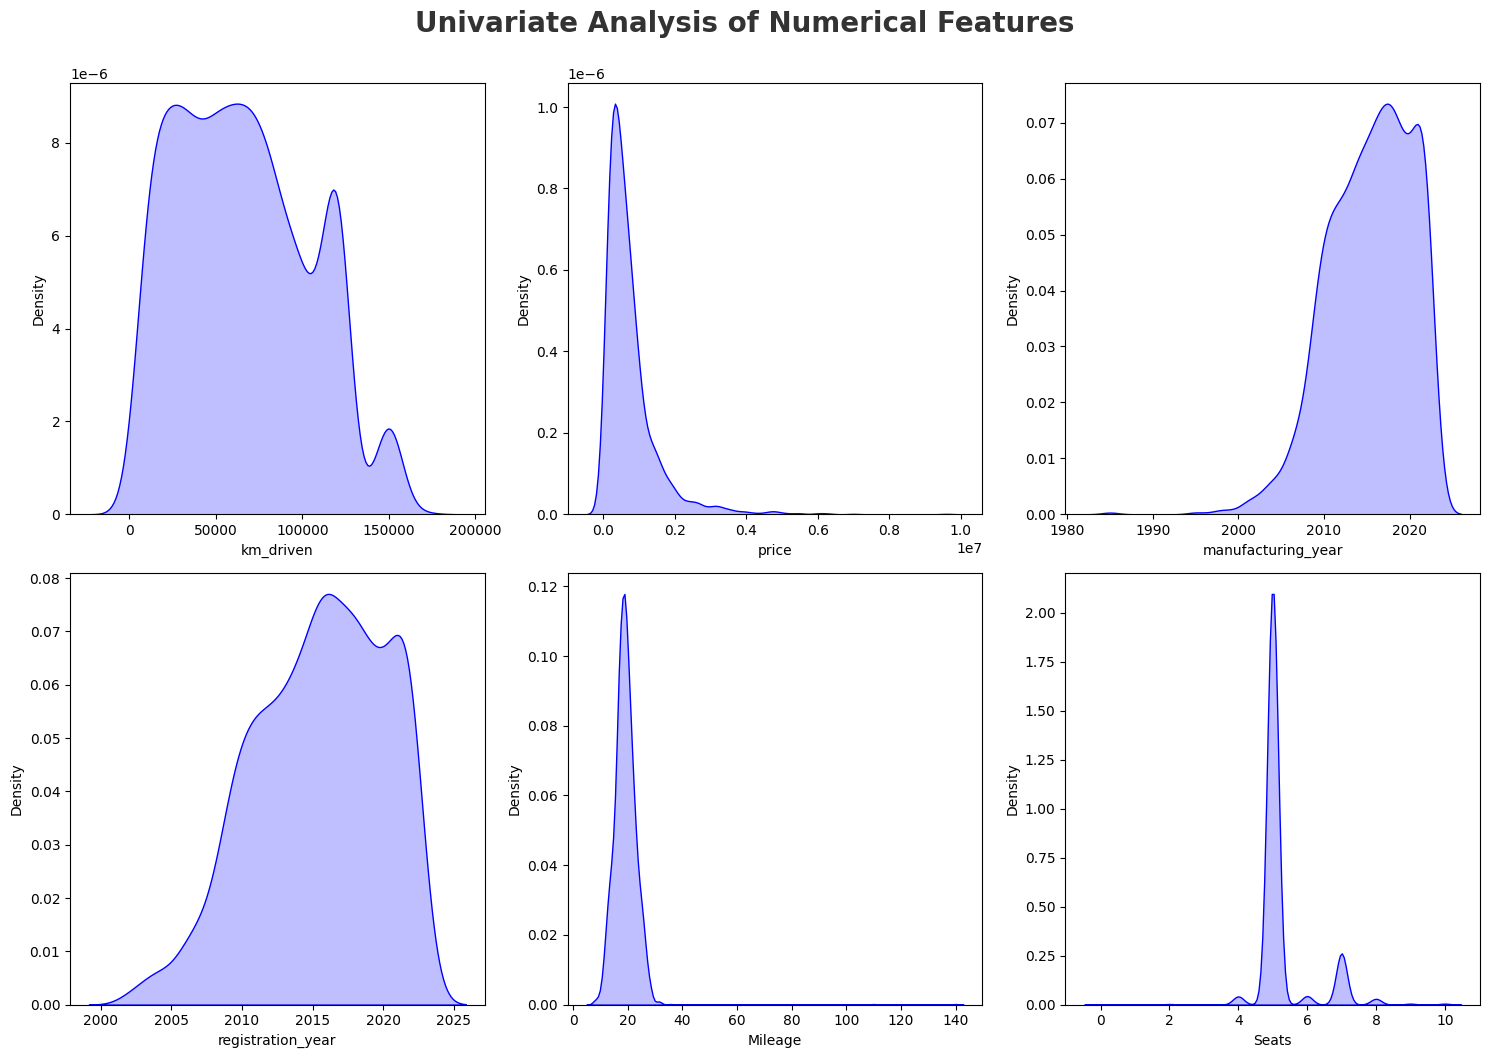

In [14]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

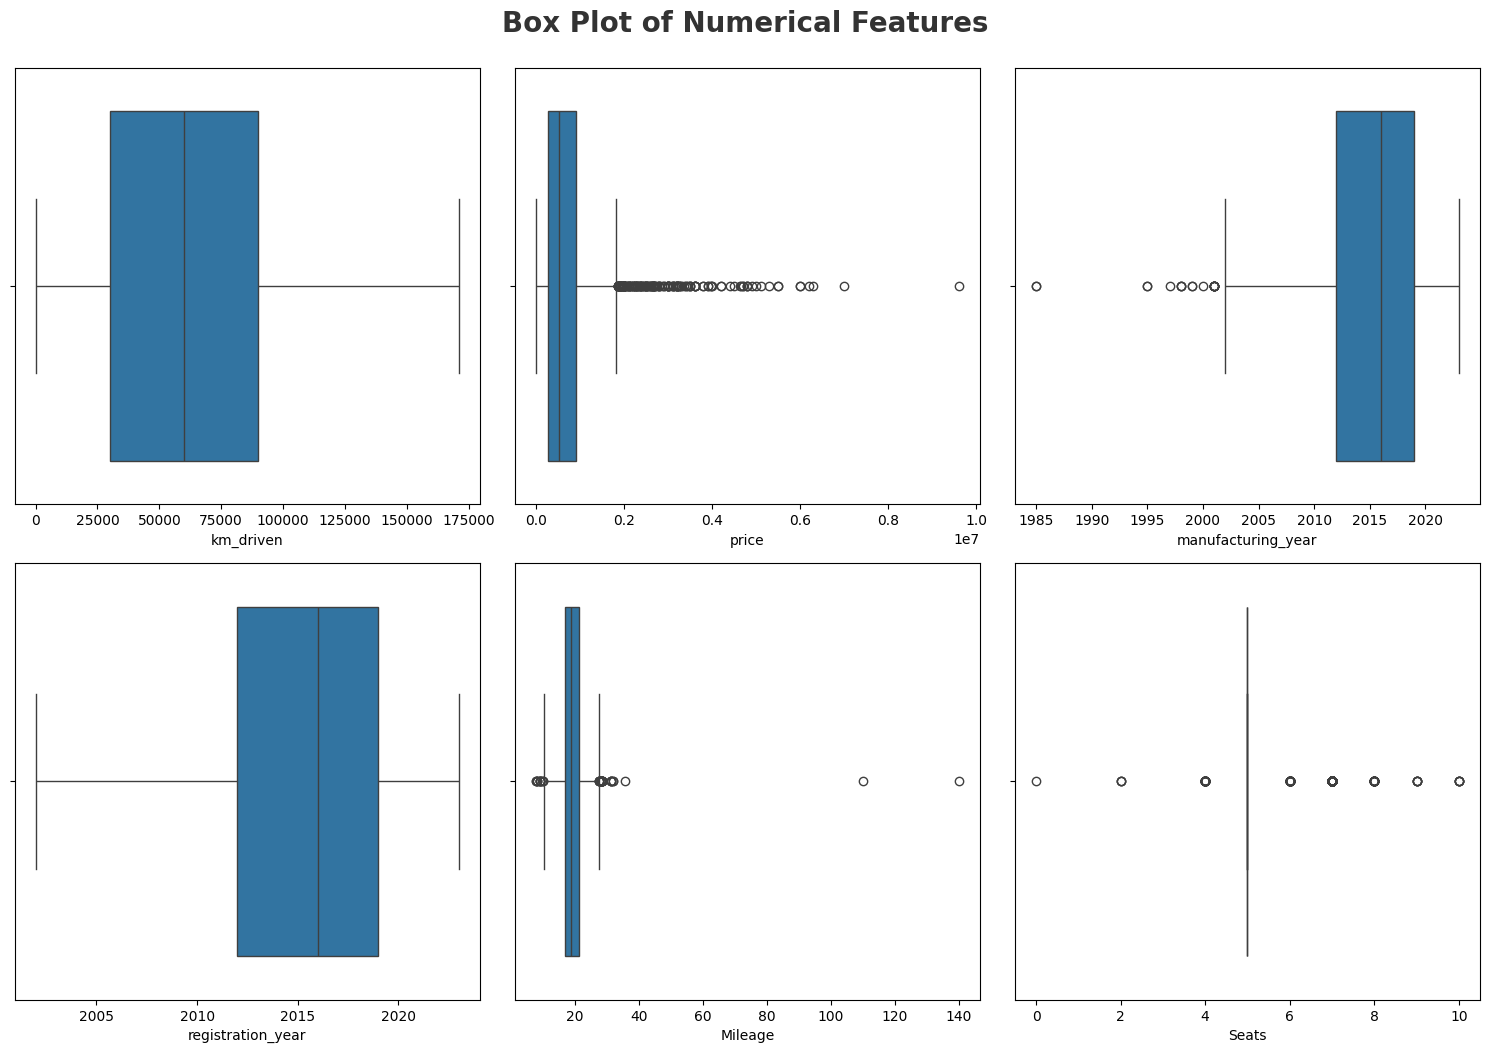

In [15]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

##### Report:
##### 1. Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
##### 2. Outliers in km_driven, enginer, selling_price, and max power.

### Categorical Features

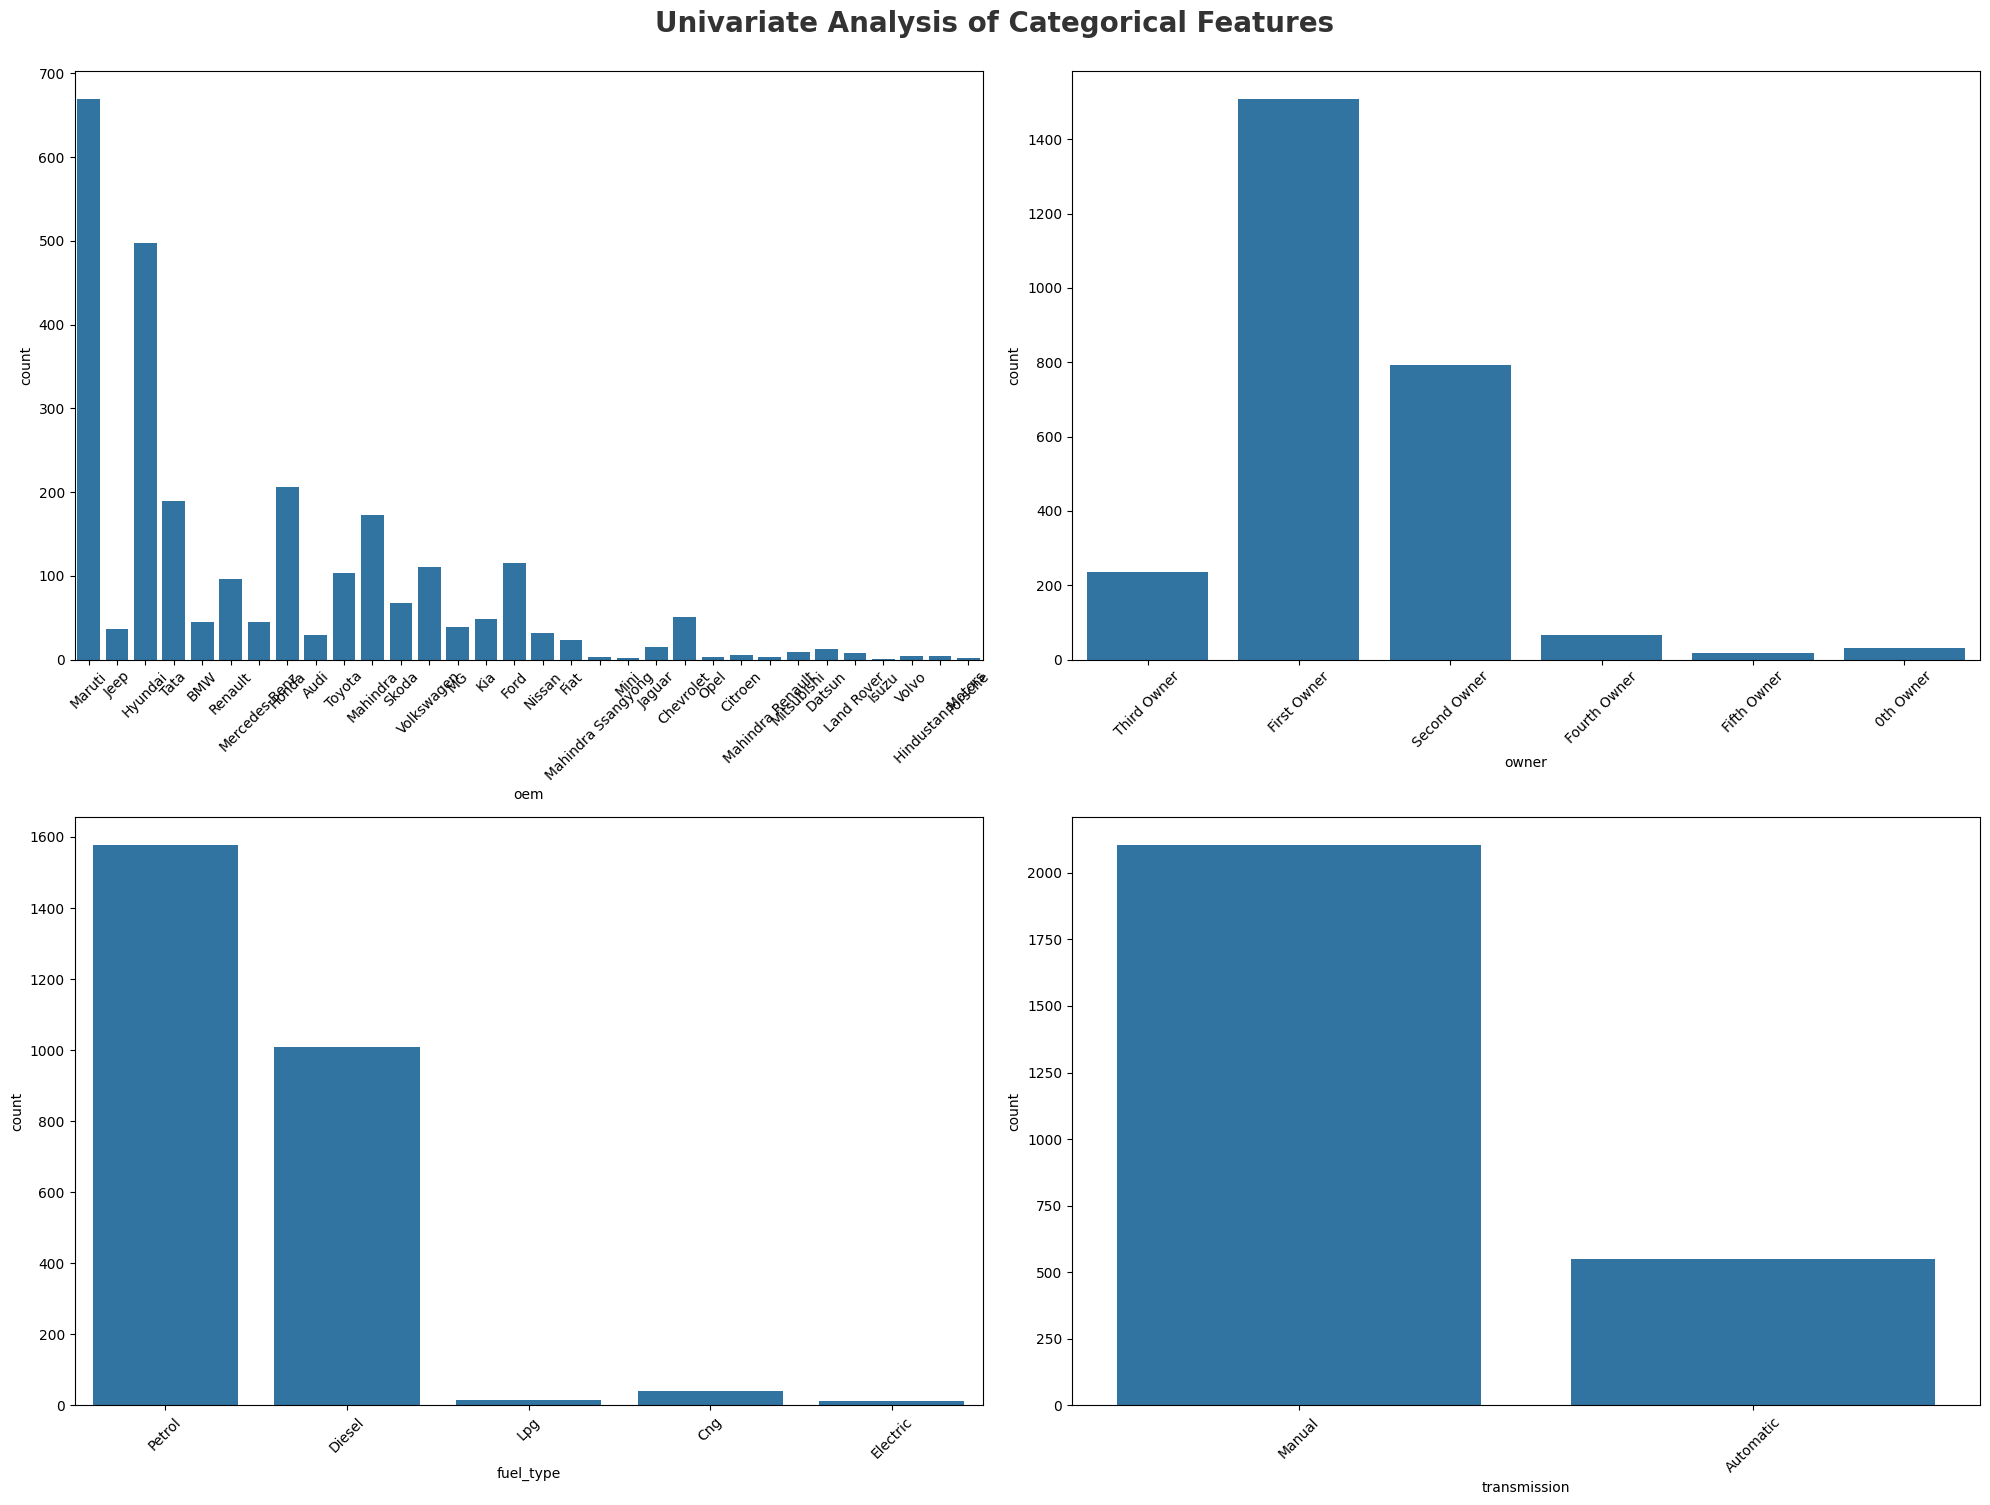

In [16]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = [ 'oem', 'owner', 'fuel_type', 'transmission']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Bivariate Analysis

In [17]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['km_driven', 'price', 'manufacturing_year', 'registration_year', 'Mileage']


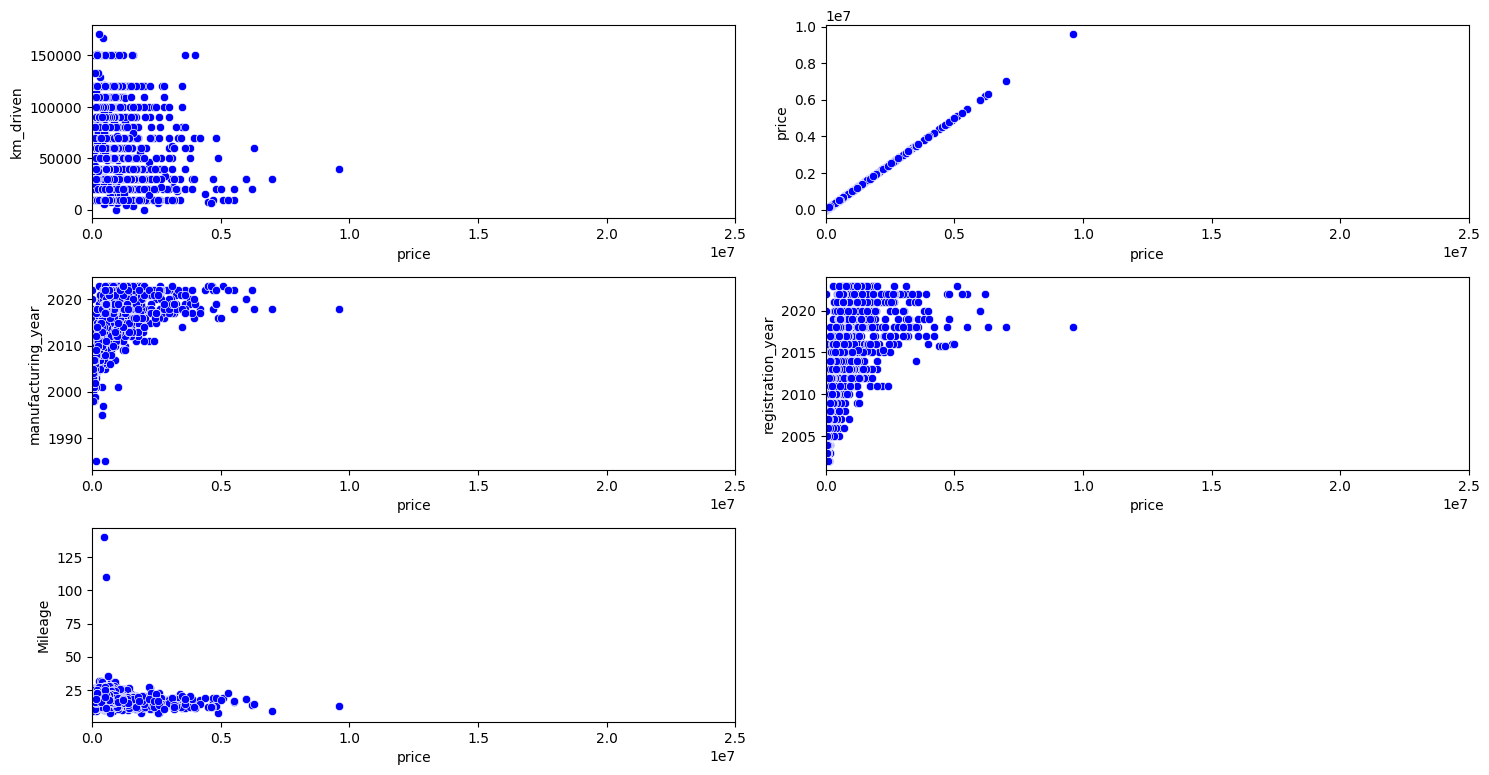

In [18]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

#### Inference:
##### 1. Lower Vehicle age has more selling price than Vehicle with more age.
##### 2. Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.
##### 3. Kms Driven has negative effect on selling price.

### Multivariate Analysis
##### Check Multicollinearity in Numerical features

In [19]:
df[numeric_features].corr()

,km_driven,price,manufacturing_year,registration_year,Mileage,Seats
km_driven,1.000000,-0.290184,-0.523422,-0.540882,-0.029976,0.136852
price,-0.290184,1.000000,0.478310,0.473427,-0.201082,0.146883
manufacturing_year,-0.523422,0.478310,1.000000,0.938910,0.179274,0.012578
registration_year,-0.540882,0.473427,0.938910,1.000000,0.172734,0.014274
Mileage,-0.029976,-0.201082,0.179274,0.172734,1.000000,-0.279390
Seats,0.136852,0.146883,0.012578,0.014274,-0.279390,1.000000


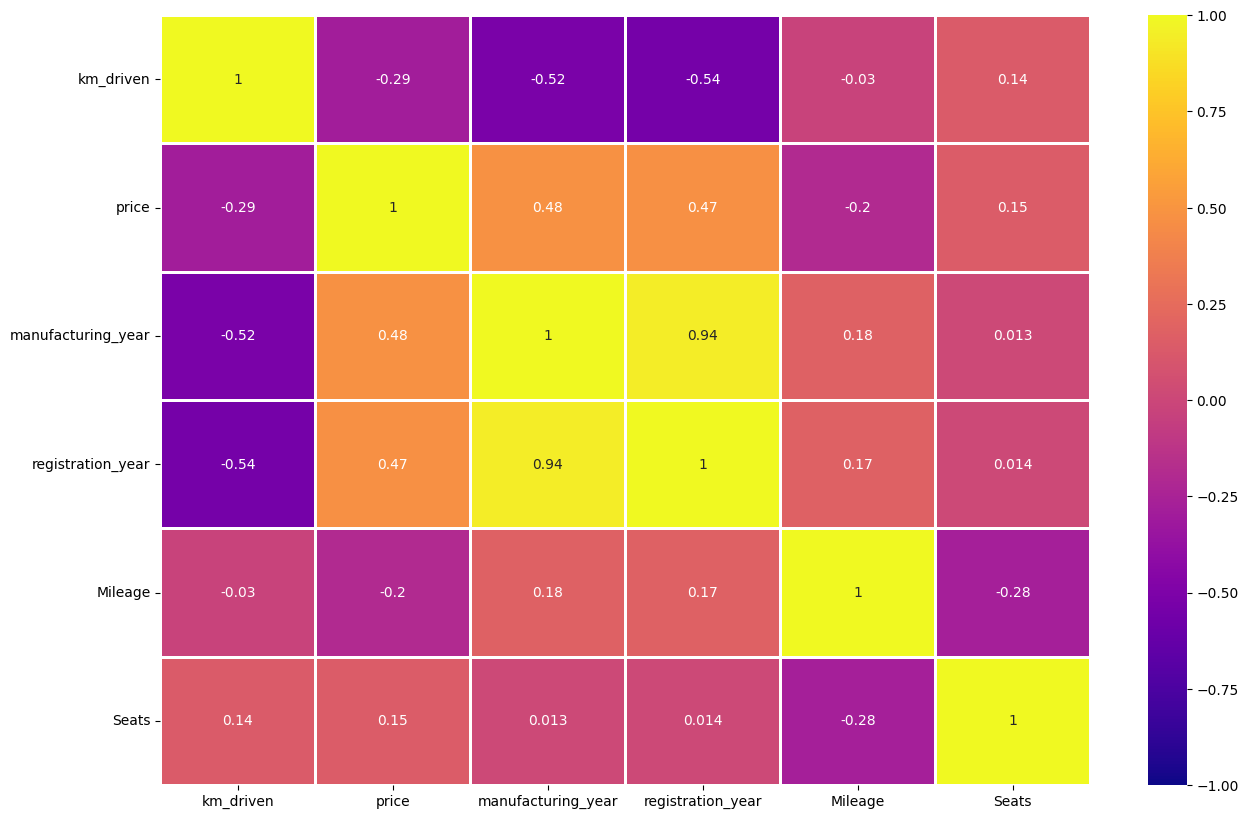

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df[numeric_features].corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

##### Inference:
##### 1. Max Power and Engine are highly correlated
##### 2. Max Power and Selling Price are highly correlated.

### Check Multicollinearity for Categorical features:

##### 1. A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test
##### 2. A chi-square statistic is one way to show a relationship between two categorical variables.
##### 3. Here we test correlation of Categorical columns with Target column i.e Selling Price

In [21]:
from scipy.stats import chi2_contingency
chi2_test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
test_result = pd.DataFrame(data=[categorical_features, chi2_test]).T
test_result.columns = ['Categorical Features', 'Hypothesis Result']

print('-'*100)
print('Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :')
print('-'*100)

test_result

----------------------------------------------------------------------------------------------------
Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :
----------------------------------------------------------------------------------------------------


,Categorical Features,Hypothesis Result
0,fuel_type,Reject Null Hypothesis
1,body_type,Reject Null Hypothesis
2,owner,Reject Null Hypothesis
3,link,Fail to Reject Null Hypothesis
4,features,Reject Null Hypothesis
5,oem,Reject Null Hypothesis
6,model,Reject Null Hypothesis
7,transmission,Reject Null Hypothesis
8,variantName,Reject Null Hypothesis
9,City,Reject Null Hypothesis


##### Data cleaning is not required as of now. Preprocessing will be taken care during feature engineering

## Insights from Data Visualization

### Selling Price Distribution (Target Feature Distribution)

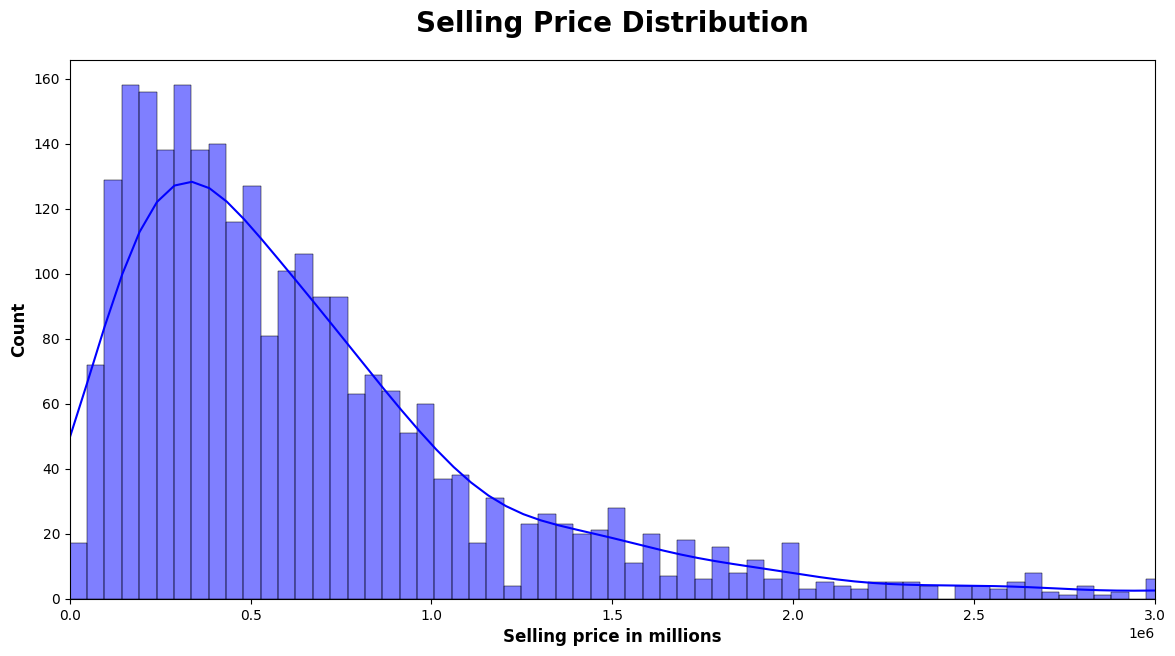

In [22]:
plt.subplots(figsize=(14,7))
sns.histplot(df.price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

##### From the chart it is clear that the Target Variable Skewed

### Most Sold Car Brand on CarDekho Website

In [23]:
print('-'*50)
print('Top 10 Sold Cars on CarDekho Website')
print('-'*50)

df.model.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars on CarDekho Website
--------------------------------------------------


model
Honda City            102
Maruti Swift Dzire     86
Maruti Swift           84
Hyundai i20            80
Maruti Wagon R         76
Hyundai i10            68
Hyundai Verna          63
Mahindra XUV500        56
Volkswagen Polo        56
Maruti Baleno          53
Name: count, dtype: int64

##### Most Selling Used Car is Honda City

##### Check mean price of Honda City which is most sold

In [24]:
City = df[df['model'] == 'Honda City']['price'].mean()
print(f'The mean price of Honda City is {City:.2f} Rupees')

The mean price of Honda City is 674078.38 Rupees


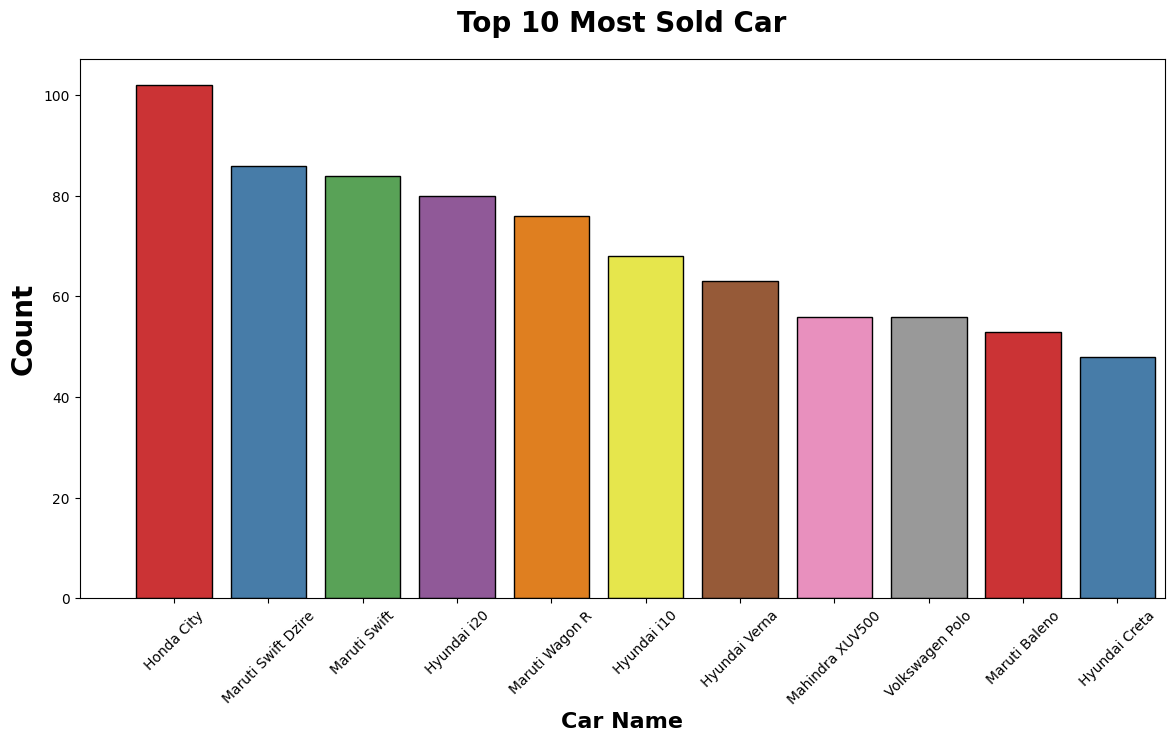

In [25]:
plt.subplots(figsize=(14,7))
sns.countplot(x="model", data=df,ec = "black",palette="Set1",order = df['model'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

##### Inference:
##### 1.As per the Chart these are top 10 most selling cars in used car website.
##### 2. Mean Price of Most Sold Car is 6.7 lakhs.
##### 3. This Feature has impact on the Target Variable.

### Most Sold Car Brand on CarDekho Website

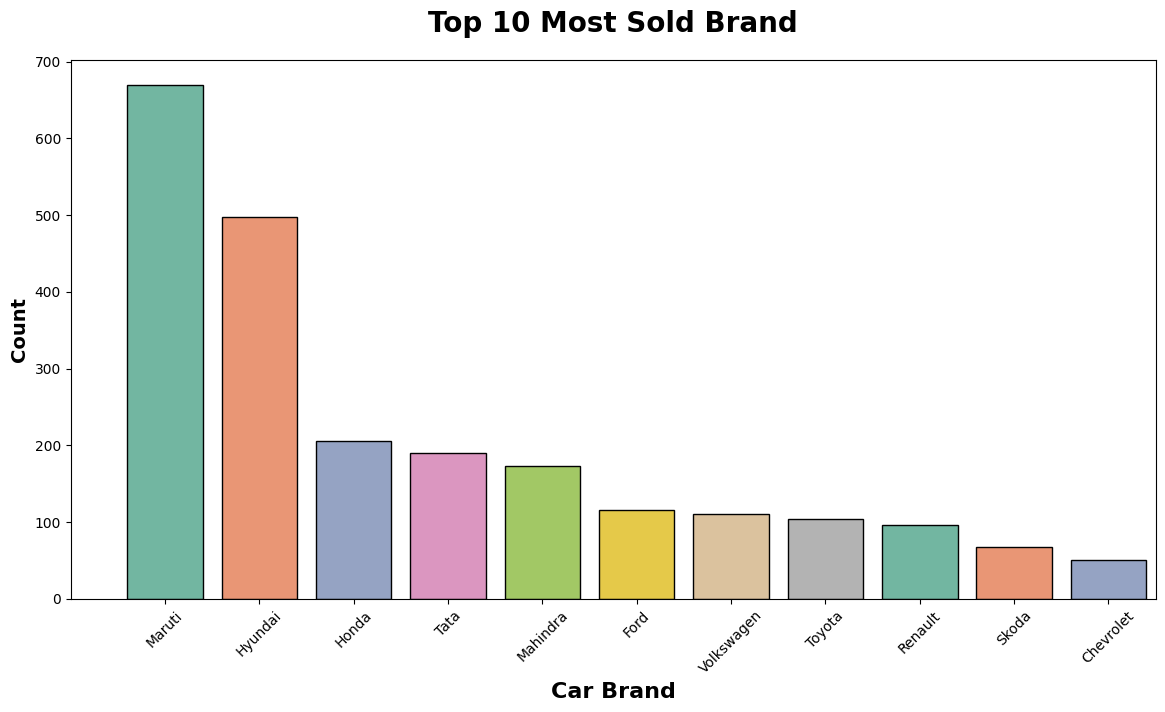

In [25]:
plt.subplots(figsize=(14,7))
sns.countplot(x="oem", data=df,ec = "black",palette="Set2",order = df['oem'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Car Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

### Check the Mean price of Maruti brand which is most sold

In [26]:
maruti = df[df['oem'] == 'Maruti']['price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 456153.92 Rupees


##### Inference:
##### As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
##### Following Maruti we have Hyundai and Honda.
##### Mean Price of Maruti Brand is 4.5 lakhs.

### Costlier Brand on CarDekho Website

In [27]:
brand = df.groupby('oem').price.max()
brand = brand.to_frame().sort_values('price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Brands on CarDekho Website')
print('-'*50)

brand

--------------------------------------------------
Top 10 Costlier Brands on CarDekho Website
--------------------------------------------------


,price
oem,
Land Rover,9600000
Mercedes-Benz,7000000
Jaguar,6300000
Audi,6200000
BMW,5500000
Porsche,5000000
MG,4645000
Volvo,4000000
Volkswagen,3600000


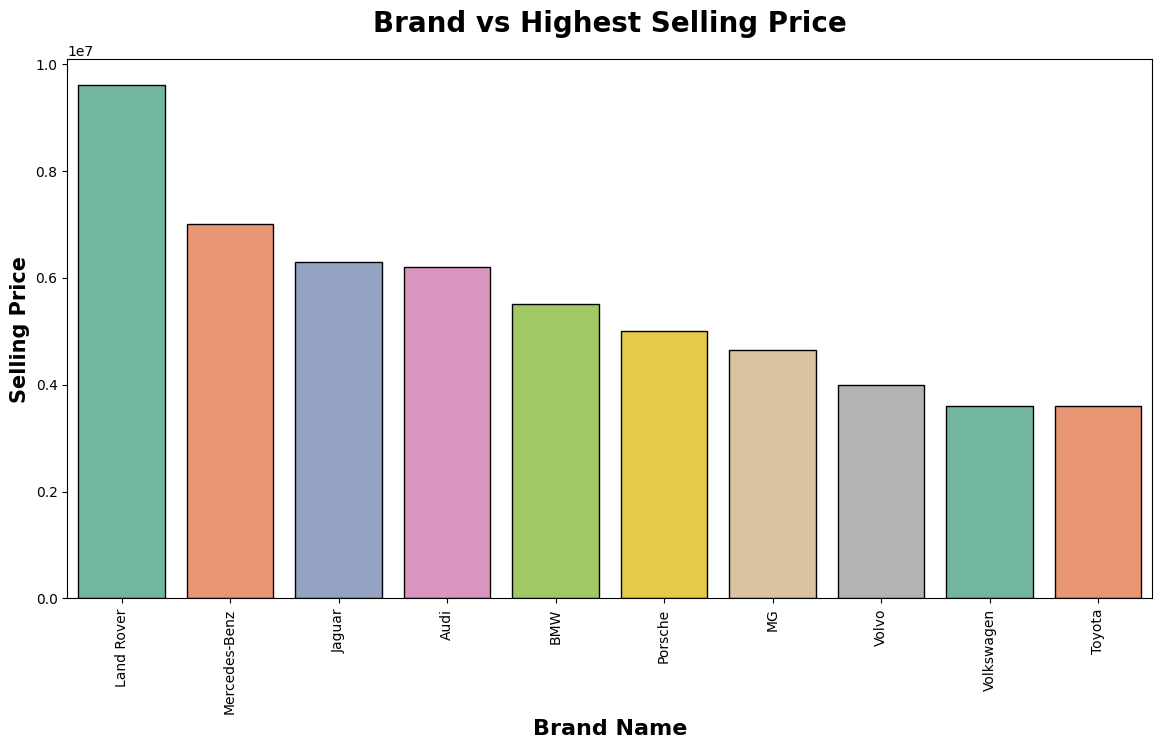

In [28]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.price,ec = "black",palette="Set2")
plt.title("Brand vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

##### Inference:
##### 1. Costliest Brand sold is Land Rover at 0.96 Crores.
##### 2. Second most costliest car Brand is Mercedes-Benz as 0.70 Crores.
##### 3. Brand name has very clear impact on selling price.

### Costlier Car on CarDekho Website

In [28]:
car= df.groupby('model').price.max()
car =car.to_frame().sort_values('price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Cars on CarDekho Website')
print('-'*50)

car

--------------------------------------------------
Top 10 Costlier Cars on CarDekho Website
--------------------------------------------------


,price
model,
Land Rover Range Rover Sport,9600000
Mercedes-Benz GLE,7000000
Jaguar XJ,6300000
Audi Q5,6200000
Land Rover Range Rover Evoque,5990000
BMW 3 Series,5500000
BMW X3,5500000
Mercedes-Benz C-Class,5300000
Audi Q3 Sportback,5100000


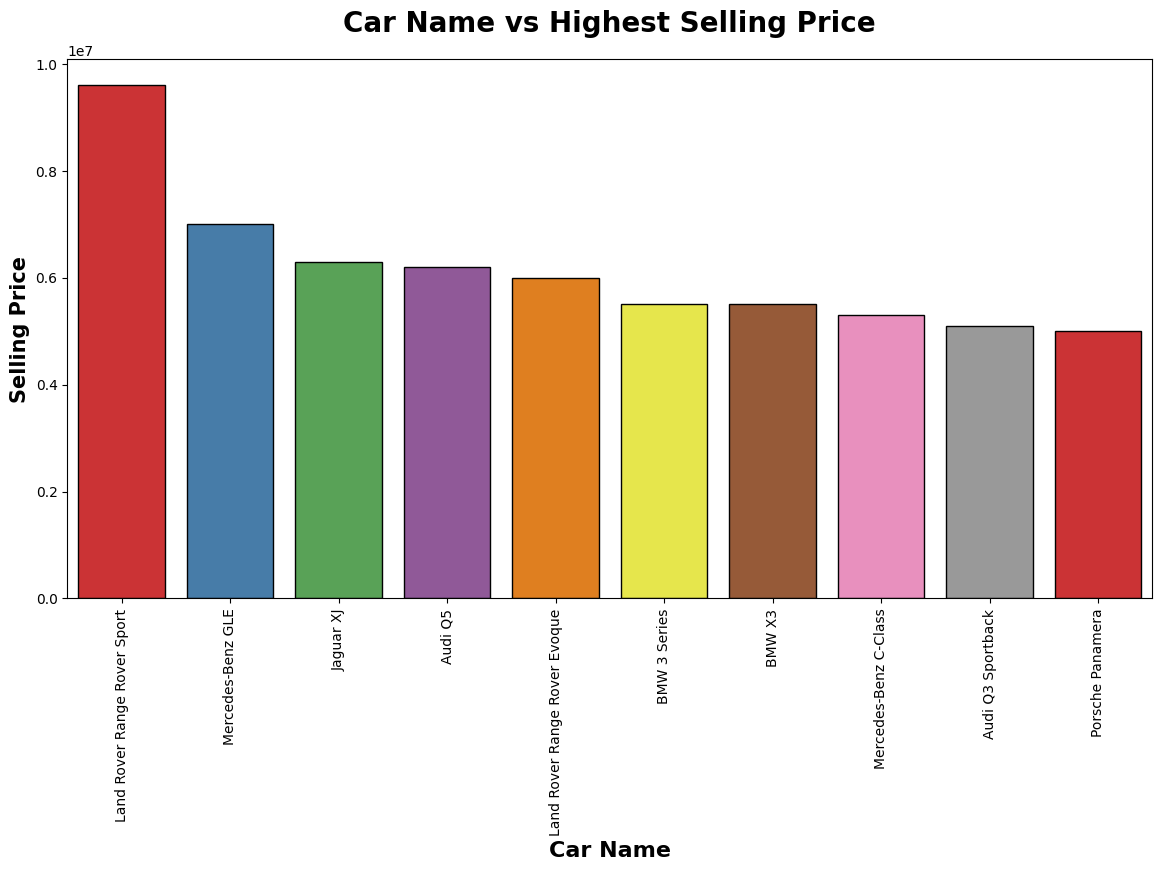

In [29]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.price,ec = "black",palette="Set1")
plt.title("Car Name vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

##### Inference
##### Costliest Car sold is Land Rover Range Rover Sport.
##### Land Rover selling price is 0.96 Crs.

### Most Mileage Car Brand on CarDekho Website

In [29]:
Mileage= df.groupby('oem')['Mileage'].mean().sort_values(ascending=False).head(15)

print('-'*50)
print('Most Mileage Car Brand on CarDekho Website')
print('-'*50)

Mileage.to_frame()

--------------------------------------------------
Most Mileage Car Brand on CarDekho Website
--------------------------------------------------


,Mileage
oem,
Datsun,21.807692
Maruti,21.154684
Renault,20.924479
Nissan,19.458129
Tata,19.419007
Hyundai,19.219659
Citroen,19.066667
Honda,18.749417
Volkswagen,18.523333


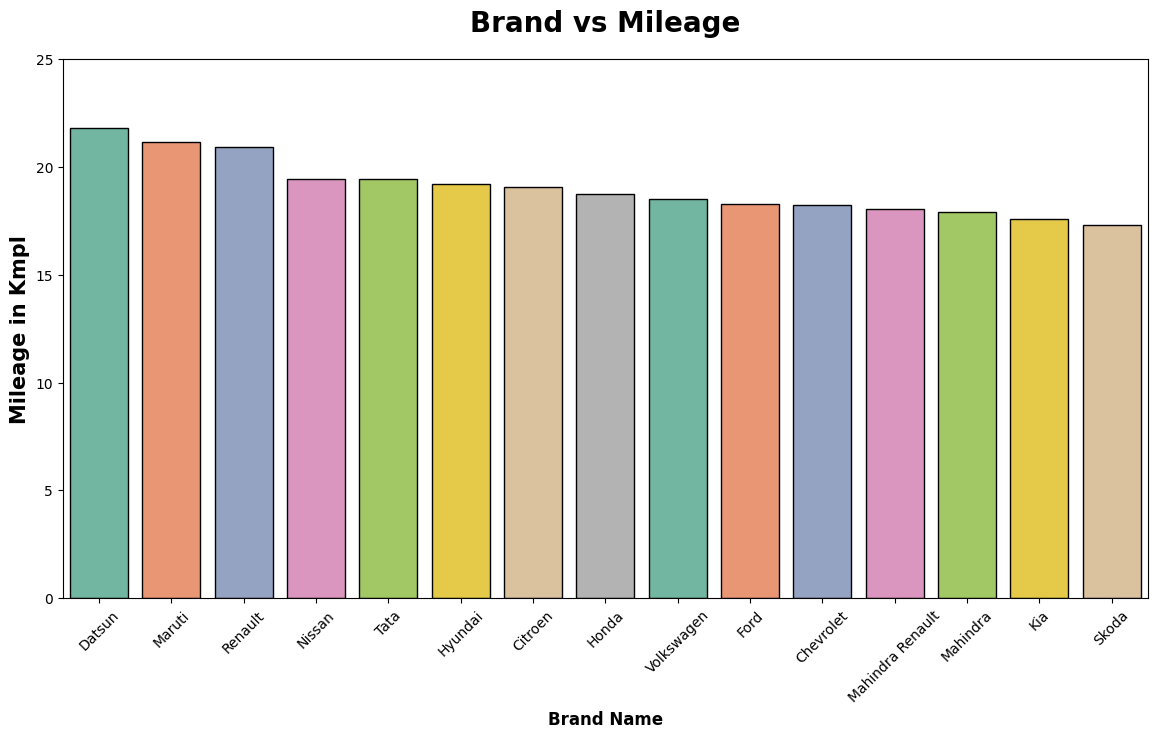

In [30]:
plt.subplots(figsize=(14,7))
sns.barplot(x=Mileage.index, y=Mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

### Most Mileage Car on CarDekho Website

In [31]:
Mileage_Car= df.groupby('model')['Mileage'].mean().sort_values(ascending=False).head(10)

print('-'*50)
print('Most Mileage Car on CarDekho Website')
print('-'*50)

Mileage_Car.to_frame()

--------------------------------------------------
Most Mileage Car on CarDekho Website
--------------------------------------------------


,Mileage
model,
Mahindra e2o Plus,125.000000
Honda City Hybrid,26.500000
Tata Nano,25.700000
Maruti Celerio,25.276667
Toyota Etios Cross,23.590000
Maruti S-Presso,23.570086
Maruti Swift Dzire Tour,23.431429
Ford Aspire,23.375000
Maruti Alto K10,23.210833


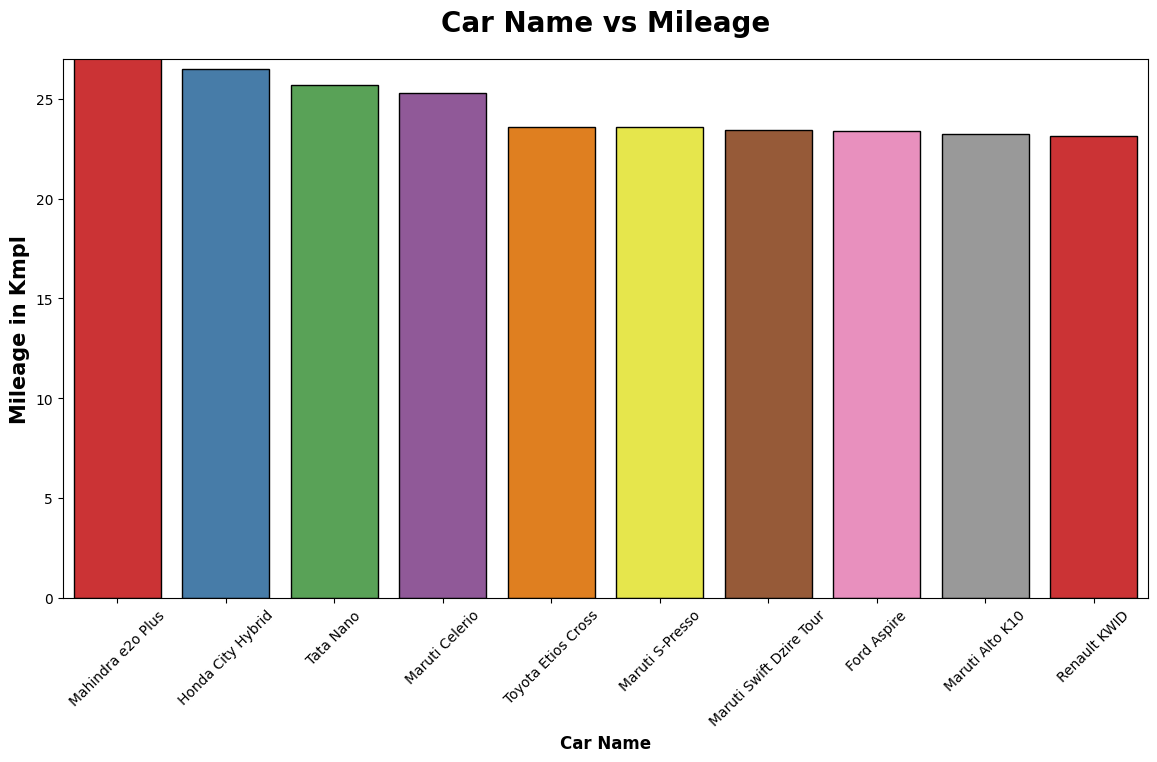

In [32]:
plt.subplots(figsize=(14,7))
sns.barplot(x=Mileage_Car.index, y=Mileage_Car.values, ec = "black", palette="Set1")
plt.title("Car Name vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

### Kilometers Driven Vs Selling Price

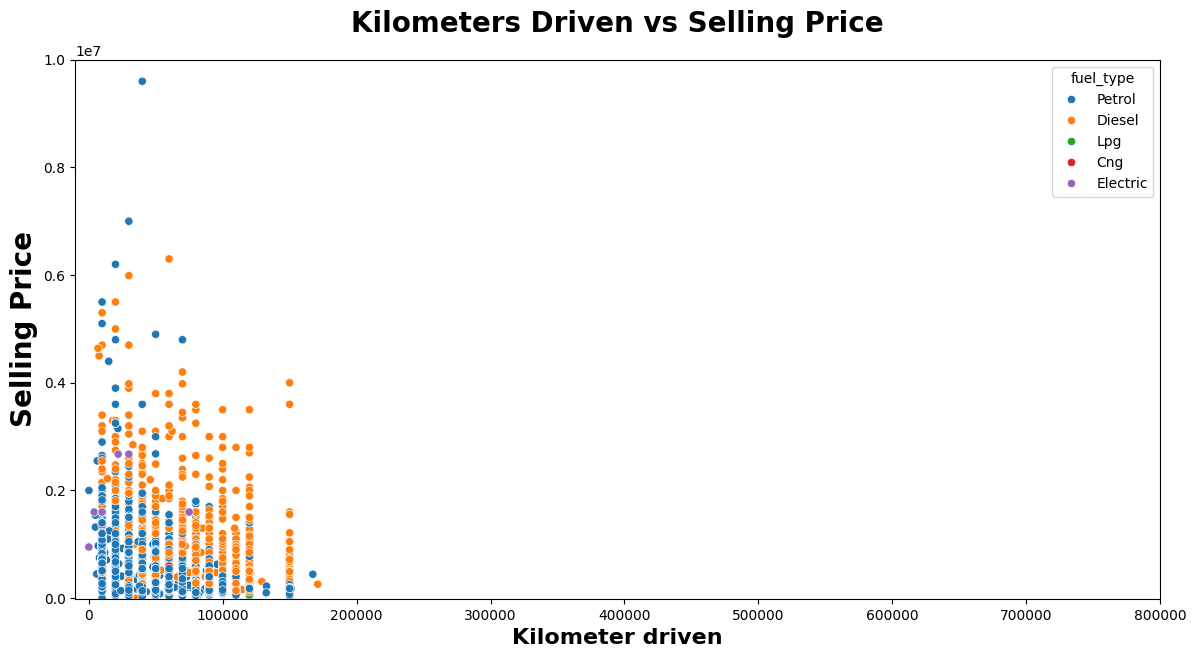

In [31]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Kilometers Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

##### Inference:
##### 1. Many Cars were sold with kms between 0 to 20k Kilometers
##### 2. Low Kms driven cars had more selling price compared to cars which had more kms driven.

### Fuel Type Vs Selling Price

In [34]:
fuel = df.groupby('fuel_type')['price'].median().sort_values(ascending=False)
fuel.to_frame()

,price
fuel_type,
Electric,1500000.0
Diesel,610000.0
Petrol,475000.0
Cng,400000.0
Lpg,215000.0


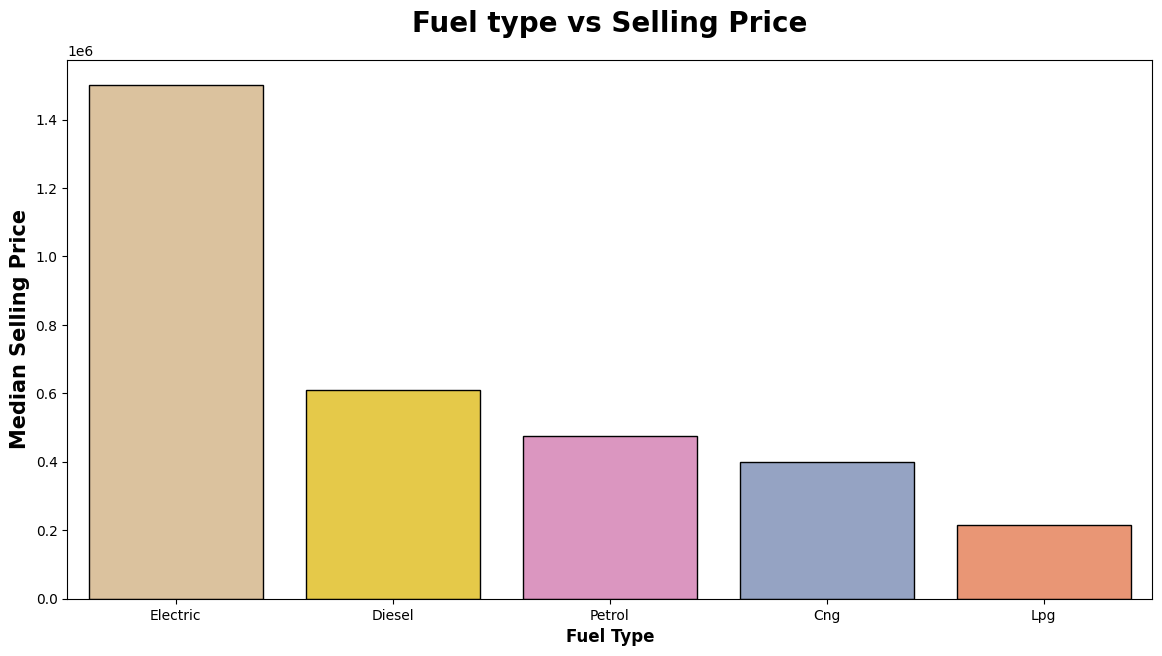

In [35]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel.index, y=fuel.values, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

###### Inference:
##### 1. Electric cars have highers selling average price.
##### 2. Followed by Diesel and Petrol.
##### 3. Fuel Type is also important feature for the Target variable

### Most Sold Fuel type

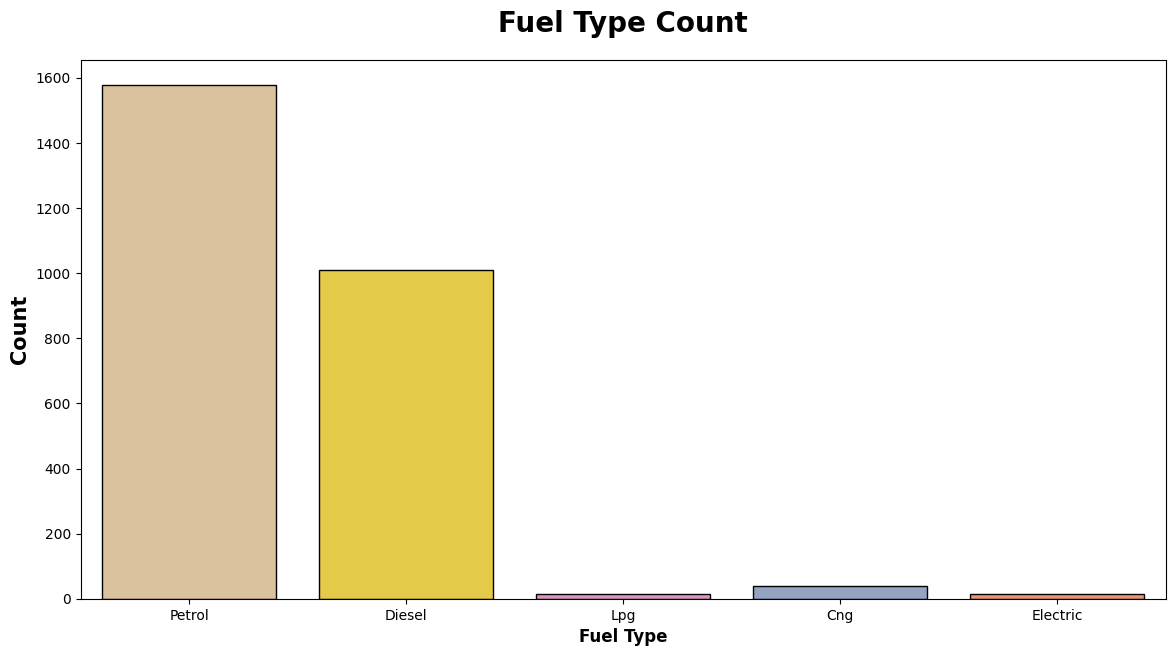

In [36]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel_type, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

##### Inference:
##### 1. Petrol and Diesel dominate the used car market in the website.
##### 2. The most sold fuel type Vechicle is Petrol.
##### 3. Followed by diesel and CNG and least sold is Electric

### Fuel Type Vs Mileage

In [37]:
fuel_mileage = df.groupby('fuel_type')['Mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,Mileage
fuel_type,
Electric,35.278435
Cng,23.744113
Diesel,19.421224
Petrol,18.476924
Lpg,16.678571


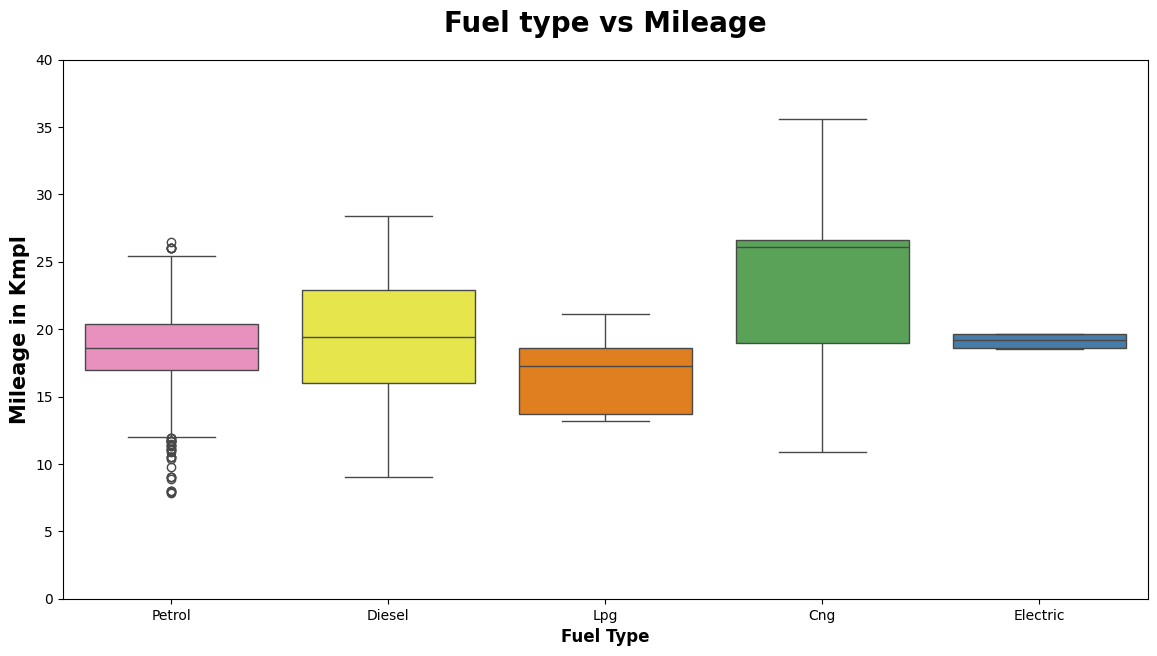

In [38]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type', y='Mileage', data=df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.ylim(0, 40)
plt.show()

### Mileage vs Selling Price

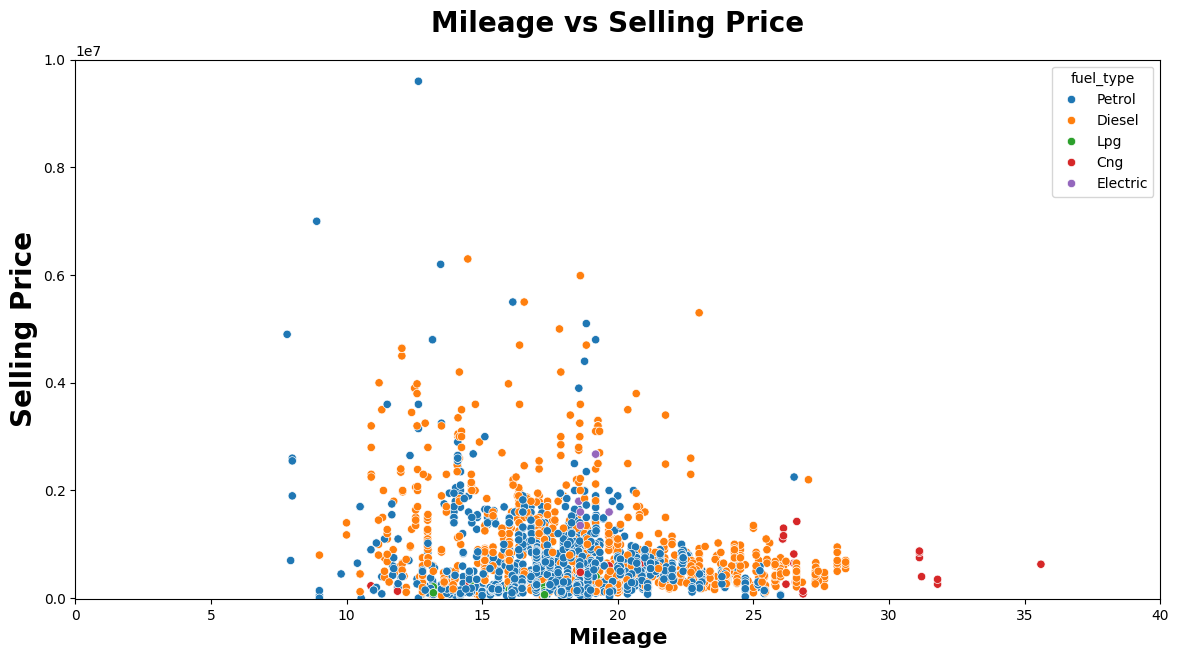

In [39]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="Mileage", y='price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.xlim(0, 40)
plt.show()

### Mileage Distribution

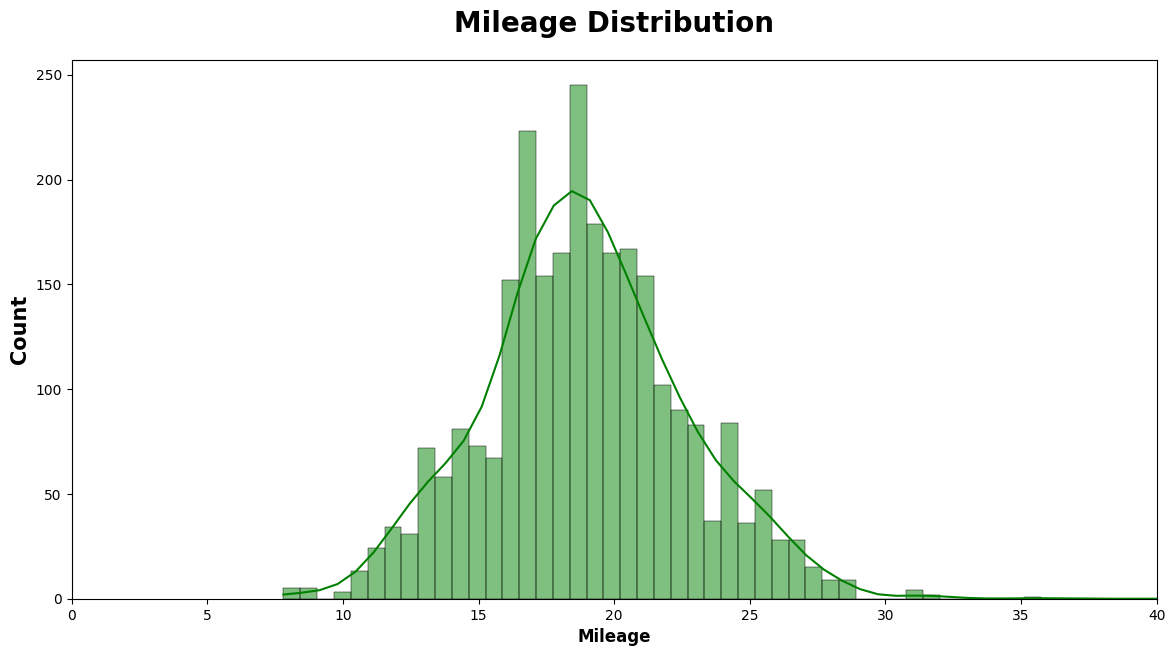

In [40]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.Mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.xlim(0, 40)
plt.show()

### manufacturing_year vs Selling Price

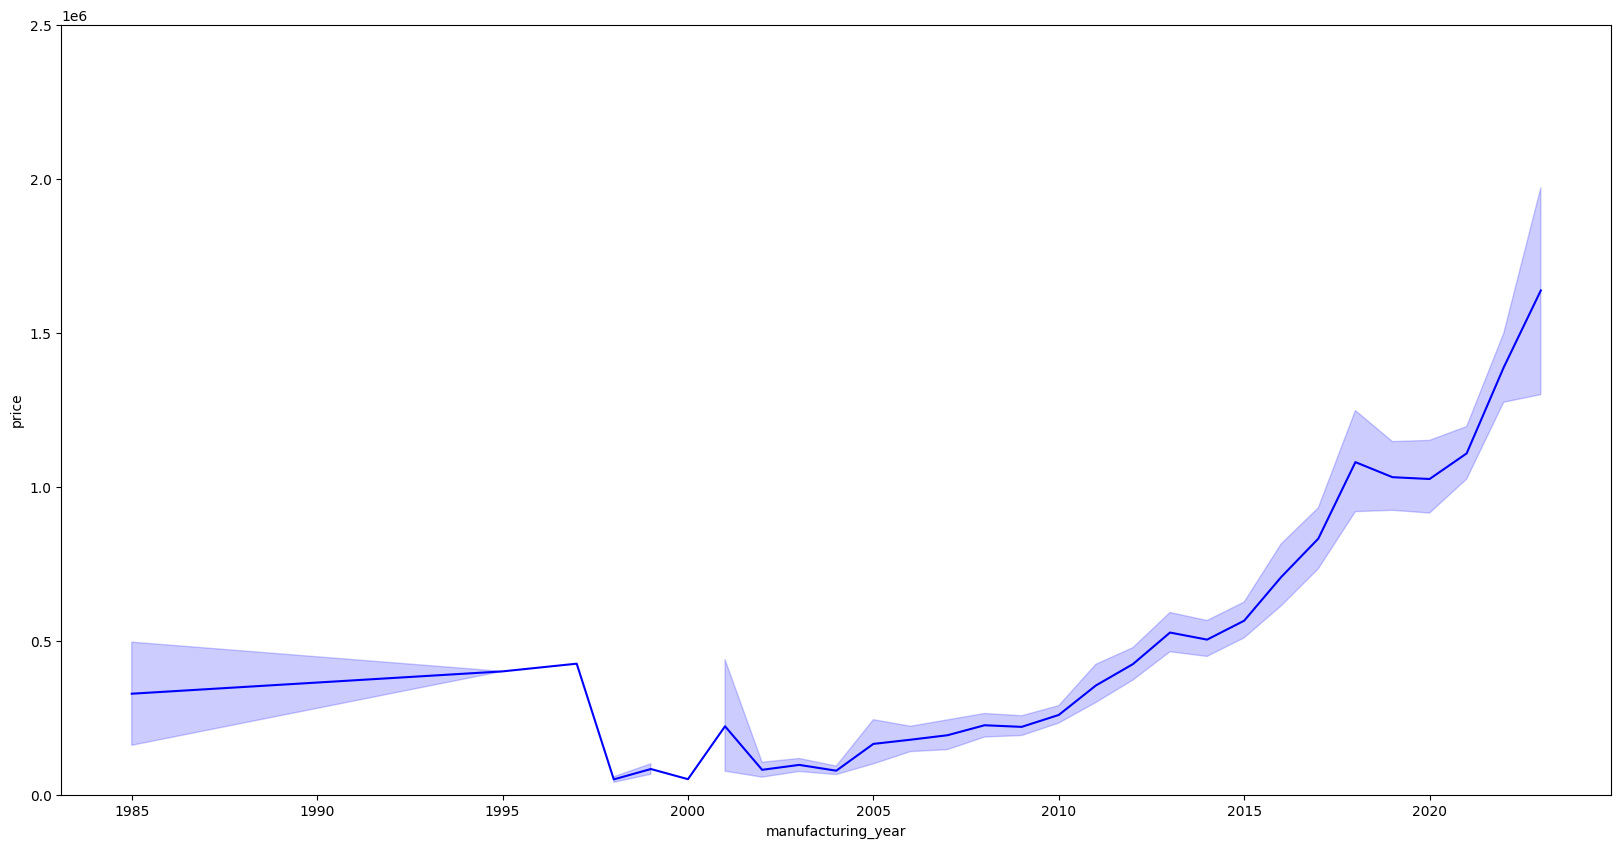

In [41]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='manufacturing_year',y='price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

##### Inference:
##### 1. As the manufacturing year increases the price also get increased.
##### 2. manufacturing year has Positive impact on selling price

### Manufacturing year vs Mileage

In [42]:
manufacturing_year = df.groupby('manufacturing_year')['Mileage'].median().sort_values(ascending=False)
manufacturing_year.to_frame().head(5)

,Mileage
manufacturing_year,
2016,20.510
2018,20.140
2014,20.070
2015,20.005
2017,19.440


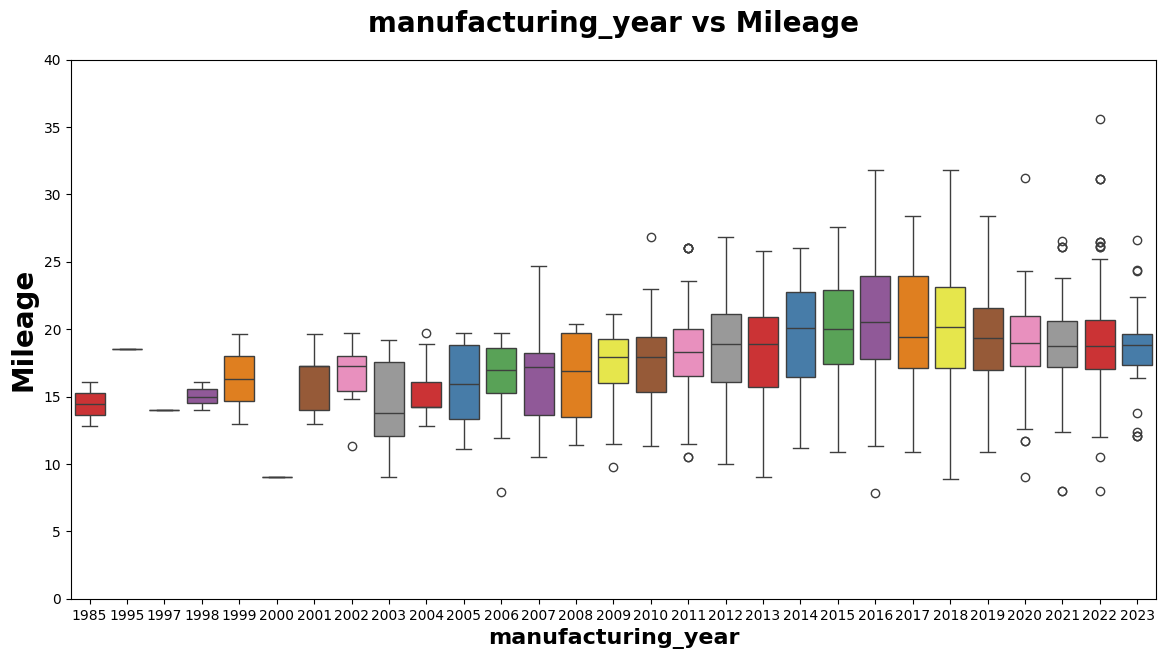

In [43]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.manufacturing_year, y= df.Mileage, palette="Set1")
plt.title("manufacturing_year vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.ylim(0,40)
plt.xlabel("manufacturing_year", weight="bold", fontsize=16)
plt.show()

##### Inference:
##### 1. As the Manufacturing Year increases the median of mileage increases.
##### 2. Newer Vehicles have more mileage median older vehicle

In [44]:
oldest = df.groupby('model')['manufacturing_year'].min().sort_values(ascending=True).head(10)
oldest.to_frame()

,manufacturing_year
model,
Ambassador,1985
Maruti 800,1985
Maruti Gypsy,1995
Hindustan Motors Contessa,1997
Maruti 1000,1998
Maruti Omni,1998
Honda City,1999
Hyundai Santro,1999
Ford Mondeo,2000


##### Inference:
##### Ambassador is the Oldest car available with manufacturing year 1985 in the used car website followed by Maruti 8000 with manufacturing year 1985.

### Transmission Type Vs Count

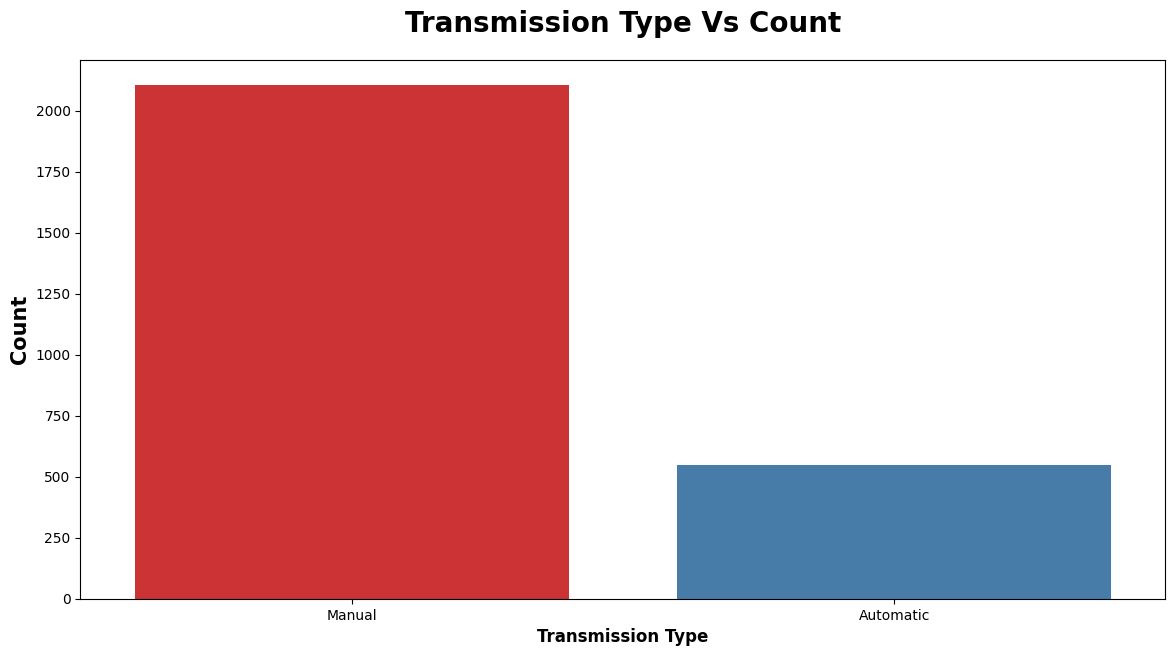

In [32]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission', data=df,palette="Set1")
plt.title("Transmission Type Vs Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

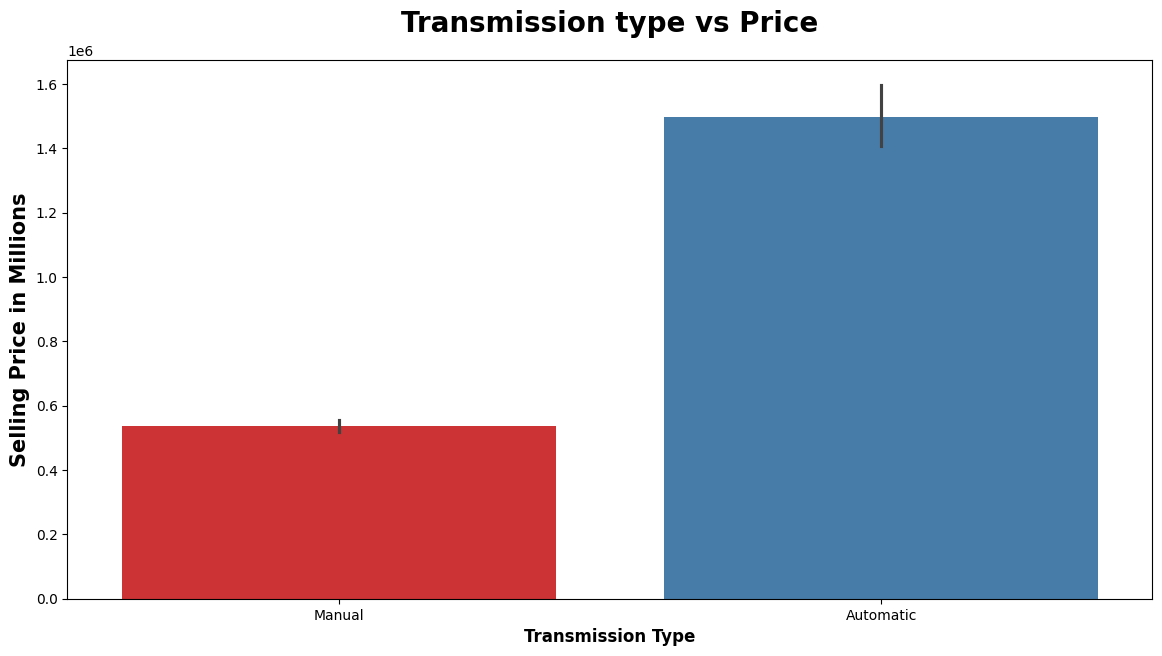

In [46]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission', y='price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

##### Inference:
##### 1. Manual Transmission was found in most of the cars which was sold.
##### 2. Automatic cars have more selling price than manual cars.

### Owner Vs Count

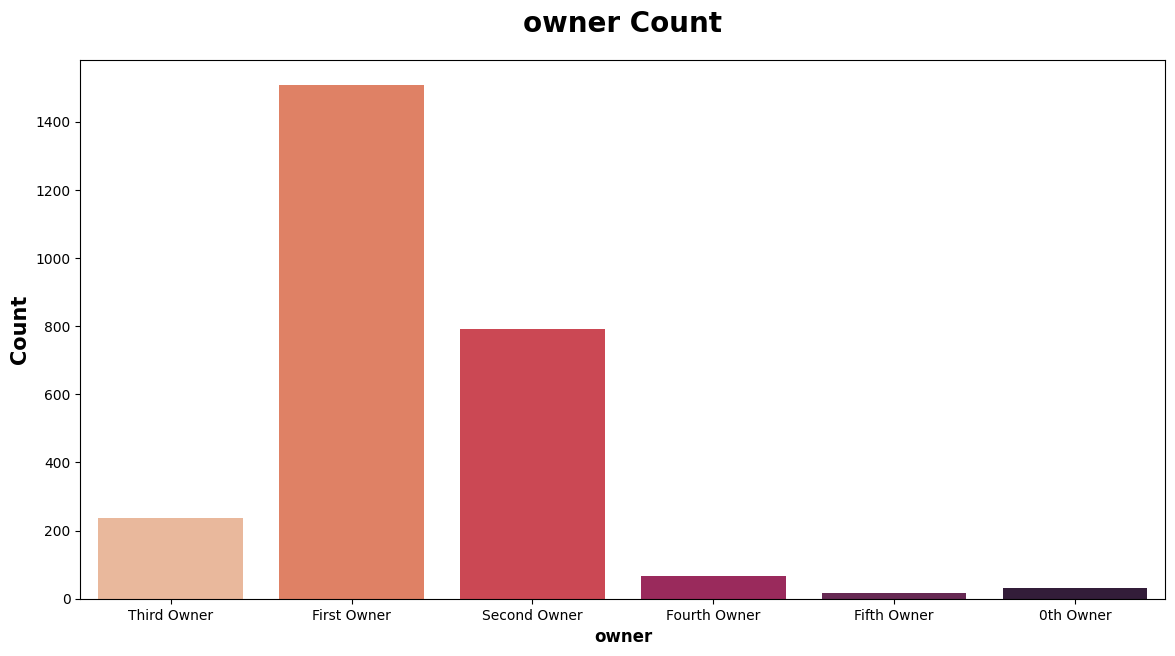

In [47]:
plt.subplots(figsize=(14,7))
sns.countplot(x='owner', data=df,palette="rocket_r")
plt.title("owner Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("owner", weight="bold", fontsize=12)
plt.show() 

### Owner vs Price

In [48]:
owner = df.groupby('owner')['price'].median().sort_values(ascending=False)
owner.to_frame()

,price
owner,
First Owner,660000.0
0th Owner,575000.0
Second Owner,400000.0
Third Owner,300000.0
Fourth Owner,230000.0
Fifth Owner,227499.5


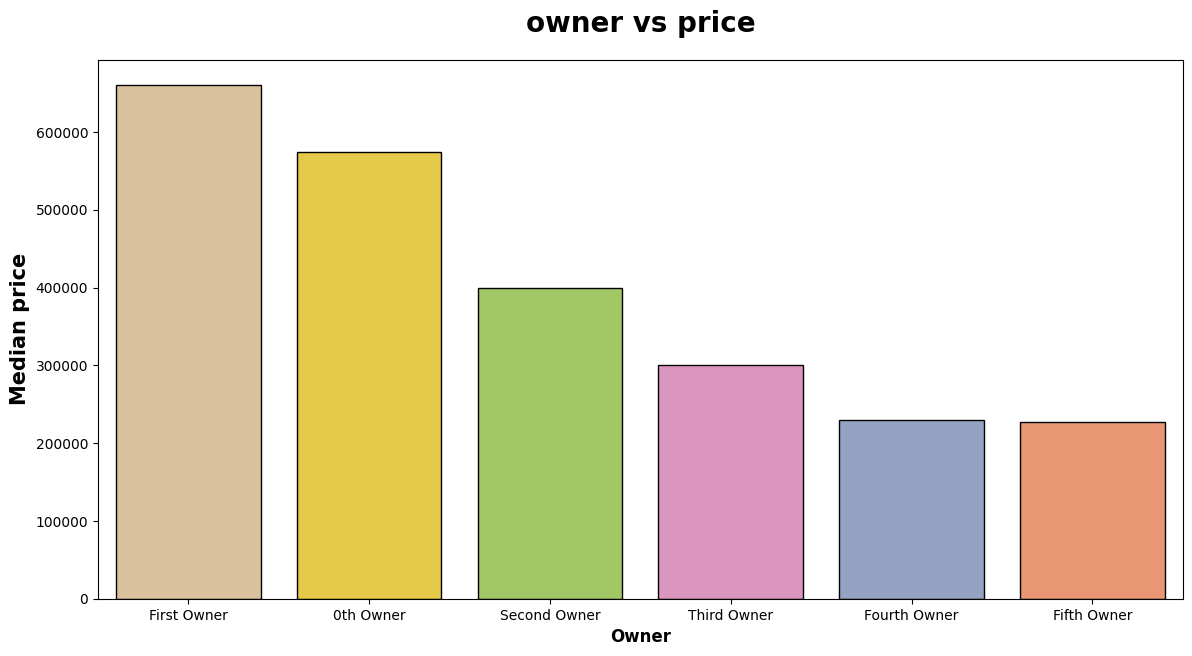

In [49]:
plt.subplots(figsize=(14,7))
sns.barplot(x=owner.index, y=owner.values, edgecolor = "black", palette="Set2_r")
plt.title("owner vs price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median price", weight="bold", fontsize=15)
plt.xlabel("Owner", weight="bold", fontsize=12)
plt.show()

##### Inference:
##### 1. First owner have put more ads on used car website.
##### 2.  First owner have median selling price of 6.6 Lakhs.
##### 3. Followed by 0th with median selling price of 5.75 Lakhs.
##### 4.  First owner have more median selling price than othe owners.

## Feature Engineering

In [33]:
df.head()

,fuel_type,body_type,km_driven,owner,price,manufacturing_year,link,features,oem,model,registration_year,Mileage,Seats,transmission,variantName,City
0,Petrol,Hatchback,120000,Third Owner,400000,2015,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Maruti,Maruti Celerio,2015.0,23.10,5.0,Manual,VXI,Bangalore
1,Diesel,SUV,60000,First Owner,790000,2015,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Maruti,Maruti SX4 S Cross,2015.0,23.65,5.0,Manual,DDiS 200 Zeta,Bangalore
2,Diesel,SUV,20000,First Owner,1900000,2020,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Jeep,Jeep Compass,2020.0,17.10,5.0,Manual,2.0 Longitude BSIV,Bangalore
3,Petrol,SUV,30000,First Owner,1200000,2021,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Hyundai,Hyundai Venue,2021.0,18.15,5.0,Automatic,SX Plus Turbo DCT BSIV,Bangalore
4,Petrol,Hatchback,50000,First Owner,690000,2018,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Maruti,Maruti Baleno,2018.0,21.40,5.0,Manual,1.2 Delta,Bangalore


### Removing unnecessary features

In [51]:
df_model=df.copy()

df_model

,fuel_type,body_type,km_driven,owner,price,manufacturing_year,link,features,oem,model,registration_year,Mileage,Seats,transmission,variantName,City
0,Petrol,Hatchback,120000,Third Owner,400000,2015,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Maruti,Maruti Celerio,2015.0,23.10,5.0,Manual,VXI,Bangalore
1,Diesel,SUV,60000,First Owner,790000,2015,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Maruti,Maruti SX4 S Cross,2015.0,23.65,5.0,Manual,DDiS 200 Zeta,Bangalore
2,Diesel,SUV,20000,First Owner,1900000,2020,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Jeep,Jeep Compass,2020.0,17.10,5.0,Manual,2.0 Longitude BSIV,Bangalore
3,Petrol,SUV,30000,First Owner,1200000,2021,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Hyundai,Hyundai Venue,2021.0,18.15,5.0,Automatic,SX Plus Turbo DCT BSIV,Bangalore
4,Petrol,Hatchback,50000,First Owner,690000,2018,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Maruti,Maruti Baleno,2018.0,21.40,5.0,Manual,1.2 Delta,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,Petrol,Hatchback,10000,First Owner,509999,2022,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Maruti,Maruti Celerio,2022.0,25.24,5.0,Manual,ZXI BSVI,Kolkata
2648,Petrol,Hatchback,120000,First Owner,180000,2014,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Maruti,Maruti Alto 800,2014.0,22.74,5.0,Manual,LXI,Kolkata
2649,Petrol,Sedan,50000,Third Owner,550000,2011,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Mercedes-Benz,Mercedes-Benz C-Class,2011.0,11.74,5.0,Automatic,C 200 CGI Elegance,Kolkata
2650,Petrol,Hatchback,40000,First Owner,140000,2012,https://www.cardekho.com/used-car-details/used...,"Power Steering, Power Windows Front, Air Condi...",Maruti,Maruti Ritz,2012.0,18.50,5.0,Manual,ZXi,Kolkata


#### Droping following columns

In [52]:
df_model.drop(labels=['model','oem','variantName', 'link', 'features','Mileage' ,'registration_year'],axis=1,inplace=True)

df_model

,fuel_type,body_type,km_driven,owner,price,manufacturing_year,Seats,transmission,City
0,Petrol,Hatchback,120000,Third Owner,400000,2015,5.0,Manual,Bangalore
1,Diesel,SUV,60000,First Owner,790000,2015,5.0,Manual,Bangalore
2,Diesel,SUV,20000,First Owner,1900000,2020,5.0,Manual,Bangalore
3,Petrol,SUV,30000,First Owner,1200000,2021,5.0,Automatic,Bangalore
4,Petrol,Hatchback,50000,First Owner,690000,2018,5.0,Manual,Bangalore
...,...,...,...,...,...,...,...,...,...
2647,Petrol,Hatchback,10000,First Owner,509999,2022,5.0,Manual,Kolkata
2648,Petrol,Hatchback,120000,First Owner,180000,2014,5.0,Manual,Kolkata
2649,Petrol,Sedan,50000,Third Owner,550000,2011,5.0,Automatic,Kolkata
2650,Petrol,Hatchback,40000,First Owner,140000,2012,5.0,Manual,Kolkata


### Converting Categorical Columns into numerical using One Hot Encoding (get_dummies)

In [53]:
df_model=pd.get_dummies(df_model,dtype=float)
df_model

,km_driven,price,manufacturing_year,Seats,fuel_type_Cng,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,fuel_type_Petrol,body_type_Coupe,...,owner_Second Owner,owner_Third Owner,transmission_Automatic,transmission_Manual,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,120000,400000,2015,5.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,60000,790000,2015,5.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,20000,1900000,2020,5.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,30000,1200000,2021,5.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,50000,690000,2018,5.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,10000,509999,2022,5.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2648,120000,180000,2014,5.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2649,50000,550000,2011,5.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2650,40000,140000,2012,5.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
df_model.dtypes

km_driven                    int64
price                        int64
manufacturing_year           int64
Seats                      float64
fuel_type_Cng              float64
fuel_type_Diesel           float64
fuel_type_Electric         float64
fuel_type_Lpg              float64
fuel_type_Petrol           float64
body_type_Coupe            float64
body_type_Hatchback        float64
body_type_MUV              float64
body_type_Minivans         float64
body_type_Pickup Trucks    float64
body_type_SUV              float64
body_type_Sedan            float64
owner_0th Owner            float64
owner_Fifth Owner          float64
owner_First Owner          float64
owner_Fourth Owner         float64
owner_Second Owner         float64
owner_Third Owner          float64
transmission_Automatic     float64
transmission_Manual        float64
City_Bangalore             float64
City_Chennai               float64
City_Delhi                 float64
City_Hyderabad             float64
City_Jaipur         

### Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)

In [55]:
X=df_model.drop('price',axis=1)     # Feature Matrix
X

,km_driven,manufacturing_year,Seats,fuel_type_Cng,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,fuel_type_Petrol,body_type_Coupe,body_type_Hatchback,...,owner_Second Owner,owner_Third Owner,transmission_Automatic,transmission_Manual,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,120000,2015,5.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,60000,2015,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,20000,2020,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,30000,2021,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,50000,2018,5.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,10000,2022,5.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2648,120000,2014,5.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2649,50000,2011,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2650,40000,2012,5.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
y=df_model['price']    # Target Variable
y

0        400000
1        790000
2       1900000
3       1200000
4        690000
         ...   
2647     509999
2648     180000
2649     550000
2650     140000
2651     500000
Name: price, Length: 2652, dtype: int64

### Checking for important features

In [57]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

print(model.fit(X,y))

ExtraTreesRegressor()


In [58]:
print('-'*50)
print('Checking for feature importance')
print('-'*50)

print(model.feature_importances_)

--------------------------------------------------
Checking for feature importance
--------------------------------------------------
[1.17756591e-01 2.11700106e-01 2.54763051e-02 4.17755536e-04
 2.10604540e-02 2.45105345e-03 3.07127482e-05 1.97468617e-02
 1.38556290e-03 5.71386914e-02 1.88565465e-02 2.94779992e-04
 3.16447940e-04 8.70736875e-02 1.40043113e-02 7.35088953e-03
 3.20757089e-04 2.30765585e-02 7.72454380e-04 1.61578428e-02
 5.68663563e-03 1.39599510e-01 1.39599343e-01 2.17002663e-02
 1.21068912e-02 1.27854057e-02 1.46042325e-02 1.05269332e-02
 1.80024123e-02]


### Visulization for feature importance

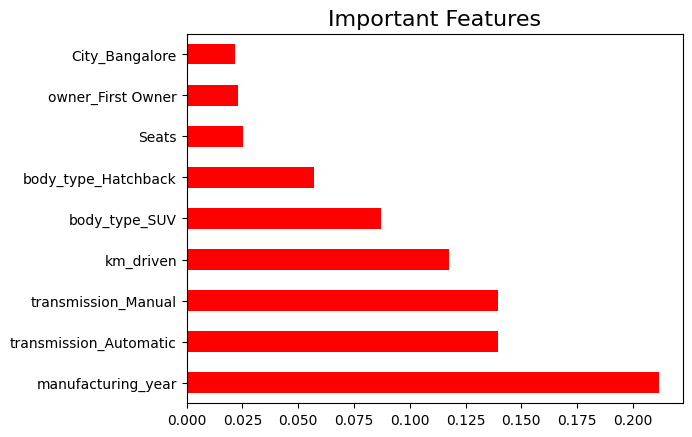

In [59]:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(9).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

##### However, we will use all features for prediction

## Model Development

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

### Model Selection

In [62]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

In [63]:
ML_model_df=pd.DataFrame({"Model":[ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', \
                                   'Random Forest Regressor', 'Ridge', 'Lasso'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

,Mean Squarred Error,Root Mean Squarred Error,Explained Variance Score,R-Sqaure Score(Accuracy)
Model,,,,
Linear Regression,3.262776e+11,571207.119730,0.472359,0.472318
Support Vector Rregression,6.765276e+11,822512.996916,0.000121,-0.094134
Decision Tree Regressor,3.566178e+11,597174.842303,0.423911,0.423250
Random Forest Regressor,2.815725e+11,530634.056122,0.544816,0.544619
Ridge,3.262513e+11,571184.077772,0.472395,0.472361
Lasso,3.262766e+11,571206.276030,0.472360,0.472320


### Generating Pickle File- Saving Trained Model

In [64]:
import pickle

saved_models = []

for model_class in models:
    model = model_class()
    regressor = model.fit(X_train, y_train)
    
    # Save the trained model to a pickle file
    model_filename = f"{model_class.__name__}_model.pkl"
    with open(model_filename, 'wb') as model_file:
        pickle.dump(regressor, model_file)

    saved_models.append(model_filename)

In [65]:
saved_models

['LinearRegression_model.pkl',
 'SVR_model.pkl',
 'DecisionTreeRegressor_model.pkl',
 'RandomForestRegressor_model.pkl',
 'Ridge_model.pkl',
 'Lasso_model.pkl']

### Initialize models

In [66]:
models = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), Ridge(), Lasso()]

In [67]:
# Lists to store model performance metrics
mse = []
rmse = []
evs = []
r_square_score = []

### Predictions on test set

In [68]:
# Loop over each model
for model in models:
    regressor = model
    regressor.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred = regressor.predict(X_test)
    
    # Evaluate performance
    mse.append(mean_squared_error(y_test, y_pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    evs.append(explained_variance_score(y_test, y_pred))
    r_square_score.append(r2_score(y_test, y_pred))

    # Print results for each model
    print(f"Model: {regressor.__class__.__name__}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"Explained Variance Score: {explained_variance_score(y_test, y_pred)}")
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")
    print('-' * 50)

Model: LinearRegression
Mean Squared Error: 326277573629.95264
Root Mean Squared Error: 571207.1197297462
Explained Variance Score: 0.47235869299497846
R^2 Score: 0.4723182448080093
--------------------------------------------------
Model: SVR
Mean Squared Error: 676527630094.9359
Root Mean Squared Error: 822512.9969155113
Explained Variance Score: 0.00012146879662355836
R^2 Score: -0.0941336951624352
--------------------------------------------------
Model: DecisionTreeRegressor
Mean Squared Error: 330470745419.6064
Root Mean Squared Error: 574865.8499333618
Explained Variance Score: 0.4668514697329008
R^2 Score: 0.4655367175790017
--------------------------------------------------
Model: RandomForestRegressor
Mean Squared Error: 285124824792.89624
Root Mean Squared Error: 533970.8089333127
Explained Variance Score: 0.5390745967744487
R^2 Score: 0.5388737070658651
--------------------------------------------------
Model: Ridge
Mean Squared Error: 326251250700.72327
Root Mean Squared E

### Trained model

In [69]:
import joblib

# Assuming model is your trained model
joblib.dump(model, 'car_price_model.pkl')


['car_price_model.pkl']